# Coffee Rating Analysis
## Kinnick Fox - DSC680

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from unidecode import unidecode

In [262]:
raw = pd.read_csv('coffee_analysis.csv')

In [263]:
raw.columns

Index(['name', 'roaster', 'roast', 'loc_country', 'origin_1', 'origin_2',
       '100g_USD', 'rating', 'review_date', 'desc_1', 'desc_2', 'desc_3'],
      dtype='object')

In [267]:
data = raw.drop(columns= ['name','review_date', 'desc_1', 'desc_2', 'desc_3','roaster','roast'],axis=0)

In [268]:
data = data[data['rating'].notna()]

In [269]:
for column in data.columns:
    if data[column].dtype == 'O':
        data[column] = data[column].apply(unidecode)
        data[column] = data[column].str.lower()
        data[column] = data[column].str.replace('[^\w\s]','')
        if column == 'origin_1' or column == 'origin_2':
            data = pd.concat([data, pd.get_dummies(data[column], prefix = 'origin')], axis = 1)
        else:
            data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis = 1)
        data = data.drop(columns = [column], axis = 1)

#for column in data.columns:
#    if column.split("_")[0] == 'origin':
#        data.rename(columns = {column:column.split(' ')[0]}, inplace = True)


data = data.groupby(by = data.columns, axis=1).sum()

data = data[data.columns[data.sum()>9]]

C:\Users\minij\AppData\Local\Temp\ipykernel_22848\3898345574.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data[column] = data[column].str.replace('[^\w\s]','')
C:\Users\minij\AppData\Local\Temp\ipykernel_22848\3898345574.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data[column] = data[column].str.replace('[^\w\s]','')
C:\Users\minij\AppData\Local\Temp\ipykernel_22848\3898345574.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data[column] = data[column].str.replace('[^\w\s]','')


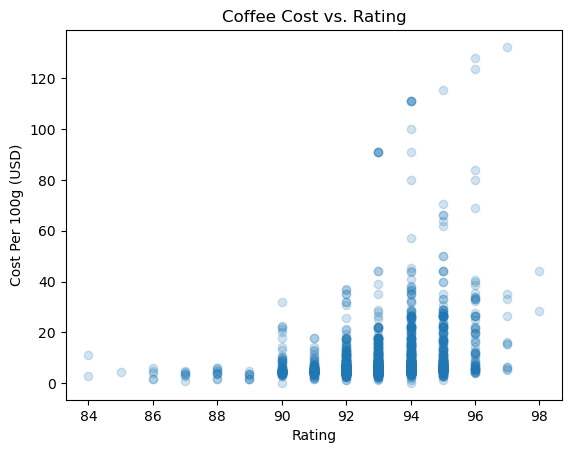

In [338]:
plt.scatter(data['rating'],data['100g_USD'],alpha=0.2)
plt.xlabel('Rating')
plt.ylabel('Cost Per 100g (USD)')
plt.title('Coffee Cost vs. Rating')
plt.show()

In [270]:
target = "rating"
x = data.loc[:, data.columns != target].columns

In [279]:
x_train, x_test, y_train, y_test = train_test_split(data[x],data[target], test_size=0.2)

In [280]:
model = LinearRegression().fit(x_train, y_train)

In [281]:
model.score(x_test, y_test)

0.17085055644201697

In [282]:
data

,100g_USD,loc_country_canada,loc_country_guatemala,loc_country_hawaii,loc_country_hong kong,loc_country_japan,loc_country_taiwan,loc_country_united states,origin_acatenango,origin_aceh,...,origin_sumatra,origin_tarrazu,origin_tolima,origin_valle de cauca,origin_western,origin_western panama,origin_yemen,origin_yirgacheffe,origin_yirgacheffe,rating
0,9.57,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0
1,16.53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.0
2,14.55,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0
3,14.33,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0
4,16.53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,4.12,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,94.0
2091,5.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0
2092,4.12,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0
2093,6.75,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0


In [283]:
feature_coef = pd.DataFrame(zip(x_train.columns, np.transpose(model.coef_)), columns=['features', 'coef'])
feature_coef.sort_values(by=["coef"],ascending=False)

,features,coef
37,origin_holualoa,1.772449
6,loc_country_taiwan,1.450281
21,origin_caicedonia,1.326364
80,origin_valle de cauca,1.258581
9,origin_aceh,1.228542
...,...,...
51,origin_kona,-0.819519
75,origin_southern colombia,-0.915732
13,origin_antigua,-0.943266
10,origin_africa,-0.980193


In [284]:
top = []
bot = []
for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(data[x],data[target], test_size=0.2)
    model = LinearRegression().fit(x_train, y_train)
    feature_coef = pd.DataFrame(zip(x_train.columns, np.transpose(model.coef_)), columns=['features', 'coef'])
    for feature in feature_coef.sort_values(by=["coef"],ascending=False).features.head():
        top.append(feature)
    for feature in feature_coef.sort_values(by=["coef"],ascending=True).features.head():
        bot.append(feature)

In [320]:
pd.Series(top).value_counts()

origin_caicedonia                          959
origin_valle de cauca                      950
origin_aceh                                733
loc_country_taiwan                         628
origin_lintong                             326
origin_big island of hawaii                322
origin_north kona                          272
origin_chiriqui                            195
origin_quindio                             133
origin_holualoa                            115
origin_democratic republic of the congo     98
origin_benchmaji                            28
origin_south kivu                           27
origin_gedeo                                24
origin_yirgacheffe                          23
origin_kiambu                               23
origin_jimma                                20
loc_country_japan                           19
origin_cauca                                18
origin_sabanilla de alajuela                18
loc_country_united states                   15
origin_tolima

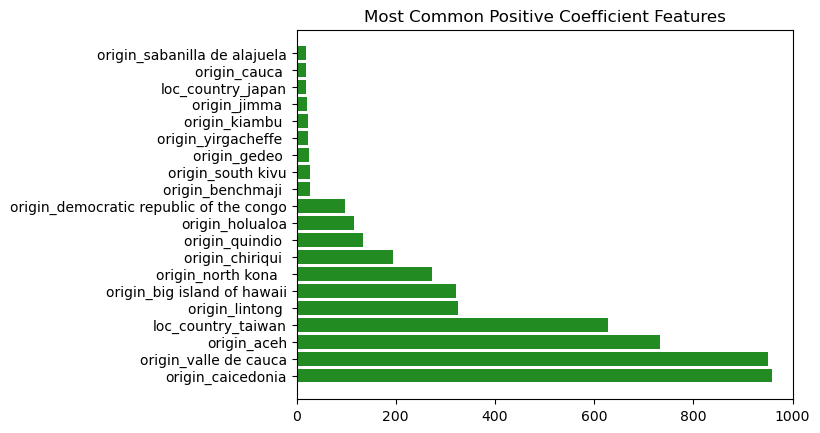

In [329]:
plt.barh(pd.Series(top).value_counts().head(20).index,pd.Series(top).value_counts().head(20).values,color='forestgreen')
plt.title('Most Common Positive Coefficient Features')
plt.xlim(0,1000)
plt.show()

In [286]:
pd.Series(bot).value_counts()

origin_kona                                930
origin_indonesia                           776
origin_southern colombia                   773
origin_sumatra                             710
origin_antigua                             472
loc_country_guatemala                      390
origin_cajamarca                           251
origin_south kivu                          163
origin_kau                                 150
origin_peru                                148
origin_central valley                      128
origin_democratic republic of the congo     45
origin_rwanda                               10
origin_central america                       9
origin_gedeb                                 9
origin_minas gerais                          8
origin_north sumatra                         8
origin_alishan                               4
origin_africa                                3
origin_antioquia                             2
origin_mexico                                2
loc_country_j

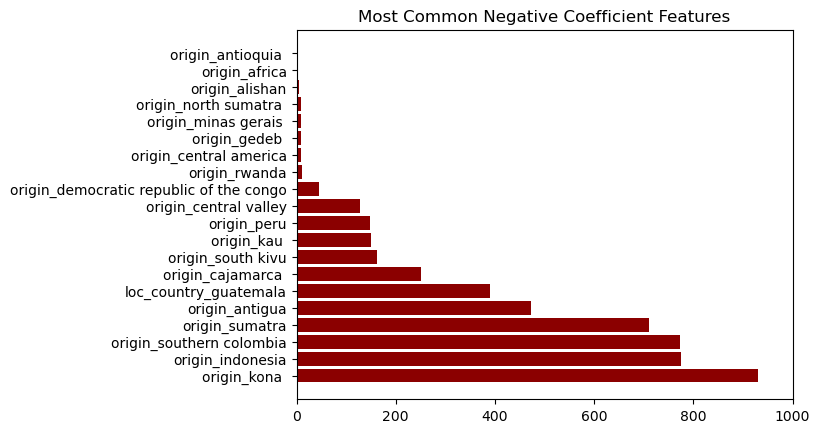

In [330]:
plt.barh(pd.Series(bot).value_counts().head(20).index,pd.Series(bot).value_counts().head(20).values,color='darkred')
plt.title('Most Common Negative Coefficient Features')
plt.xlim(0,1000)
plt.show()